In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
HOME = "/lnet/troja/projects/neuralpiece/intrinsic-segmentation-eval/"

In [3]:
def load_csv_result(path):
    vocab = []
    mean = []
    low = []
    high = []
    with open(path) as f_csv:
        f_csv.readline()
        for line in f_csv:
            vocab_str, mean_str, low_str, high_str = line.strip().split(",")
            vocab.append(int(vocab_str))
            mean.append(float(mean_str))
            low.append(float(low_str))
            high.append(float(high_str))
    return vocab, mean, low, high

In [4]:
def load_experiments_results(lng, init_type, eval_file):
    vocab = []
    mean = []
    low = []
    high = []
    for size in [1, 2, 4, 8, 16, 24, 32, 40, 48, 56, 64, 96, 72, 80, 128, 160, 192]:
        path = f"{HOME}/{lng}/experiments/from_{init_type}{size}k/{eval_file}"
        if not os.path.exists(path):
            continue
        with open(path) as f:
            data = f.readline().strip().split(",")
        if len(data) != 4:
            continue
        voc_str, mean_str, low_str, high_str = data
        vocab.append(int(voc_str))
        mean.append(float(mean_str))
        low.append(float(low_str))
        high.append(float(high_str))
    return vocab, mean, low, high

In [5]:
def plot_line_with_confidence(vocab, mean, low, high, title, ax):
    first_line = ax.plot(vocab, mean, label=title, marker=".", markersize=2)[0]
    ax.plot(vocab, low, linewidth=0, markersize=3, marker="_", color=first_line._color)
    ax.plot(vocab, high, linewidth=0, markersize=3, marker="_", color=first_line._color)
    ax.fill_between(vocab, low, high, alpha=0.2, color=first_line._color)
    
def plot_point_confidence(vocab, mean, low, high, title, ax):
    if not vocab:
        return
    if vocab[0] <= 55000:
        point = ax.plot(vocab, mean, label=title, marker=".", markersize=5, linewidth=0)[0]
        ax.plot(vocab, low, marker="_", markersize=10, linewidth=0, color=point._color)
        ax.plot(vocab, high, marker="_", markersize=10, linewidth=0, color=point._color)
    else:
        point = ax.plot([50000], mean, label=title, marker=9, markersize=8, linewidth=0)[0]
        #ax.plot([184000], mean, marker=9, markersize=8, linewidth=0, color=point._color)
        ax.plot([52000], mean, marker=9, markersize=8, linewidth=0, color=point._color)
        ax.plot([54000], mean, marker=9, markersize=8, linewidth=0, color=point._color)
        ax.annotate(str(int(vocab[0]/1000))+"k", (50000, mean[0] - 4))

In [6]:
LNG_NAMES = {
    "cs": "Czech",
    "de": "German",
    "en": "English",
    "es": "Spanish",
    "fi": "Finish",
    "fr": "French",
    "hu": "Hungarian",
    "it": "Italian",
    "mn": "Mongolian",
    "ru": "Russian"
}

def plot_lng(lng, ax, test_set, show_y_label=False):
    if not os.path.exists(f"{HOME}/{lng}/baselines/{test_set}.bpe.baseline"):
        return
    
    plot_line_with_confidence(*load_csv_result(f"{HOME}/{lng}/baselines/{test_set}.bpe.baseline"), title="BPE", ax=ax)
    plot_line_with_confidence(*load_csv_result(f"{HOME}/{lng}/baselines/{test_set}.spm.baseline"), title="SentencePiece", ax=ax)
    plot_point_confidence(*load_csv_result(f"{HOME}/{lng}/baselines/{test_set}.morfessor.baseline"), title="Morfessor", ax=ax)
    
    plot_line_with_confidence(*load_experiments_results(lng, "sp", f"{test_set}.embedding-based.score"), title="Ours: Emb. from SP", ax=ax)
    #plot_line_with_confidence(*load_experiments_results(lng, "sp", "bigrams.score"), title="Ours: Bigram from SP", ax=ax)

    plot_line_with_confidence(*load_experiments_results(lng, "bpe", f"{test_set}.embedding-based.score"), title="Ours: Emb. from BPE", ax=ax)
    #plot_line_with_confidence(*load_experiments_results(lng, "bpe", "bigrams.score"), title="Ours: Bigram from BPE", ax=ax)
    
    ax.annotate(LNG_NAMES[lng], (42000,40), fontsize=20, horizontalalignment="right")
    
    ax.set_xlabel("Subword vocabulary size")
    #ax.set_xlim(0, 192000)
    ax.set_xlim(500, 55000)
    
    #ax.set_xlim(0, 150000)
    #ax.set_xticks([0, 50000, 100000, 150000])    
    #ax.set_xticklabels(["0", "50k", "100k", "150k"])
    
    #ax.set_ylim(40, 100)
    if show_y_label:
        ax.set_ylabel("Boundary position precision")

In [8]:
def plot_all_results(test_set):
    fig, axs = plt.subplots(2, 5, sharey=True, figsize=(16, 8))
    plot_lng("cs", axs[0, 0], test_set, show_y_label=True)
    plot_lng("de", axs[0, 1], test_set)
    plot_lng("en", axs[0, 2], test_set)
    plot_lng("es", axs[0, 3], test_set)
    plot_lng("fi", axs[0, 4], test_set)

    plot_lng("fr", axs[1, 0], test_set, show_y_label=True)
    plot_lng("hu", axs[1, 1], test_set)
    plot_lng("it", axs[1, 2], test_set)
    plot_lng("mn", axs[1, 3], test_set)
    plot_lng("ru", axs[1, 4], test_set)

    #lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
    #lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
    lines, labels = axs[0, 0].get_legend_handles_labels()
    fig.legend(lines, labels, loc="lower center", ncols=5, frameon=False, fontsize=14)

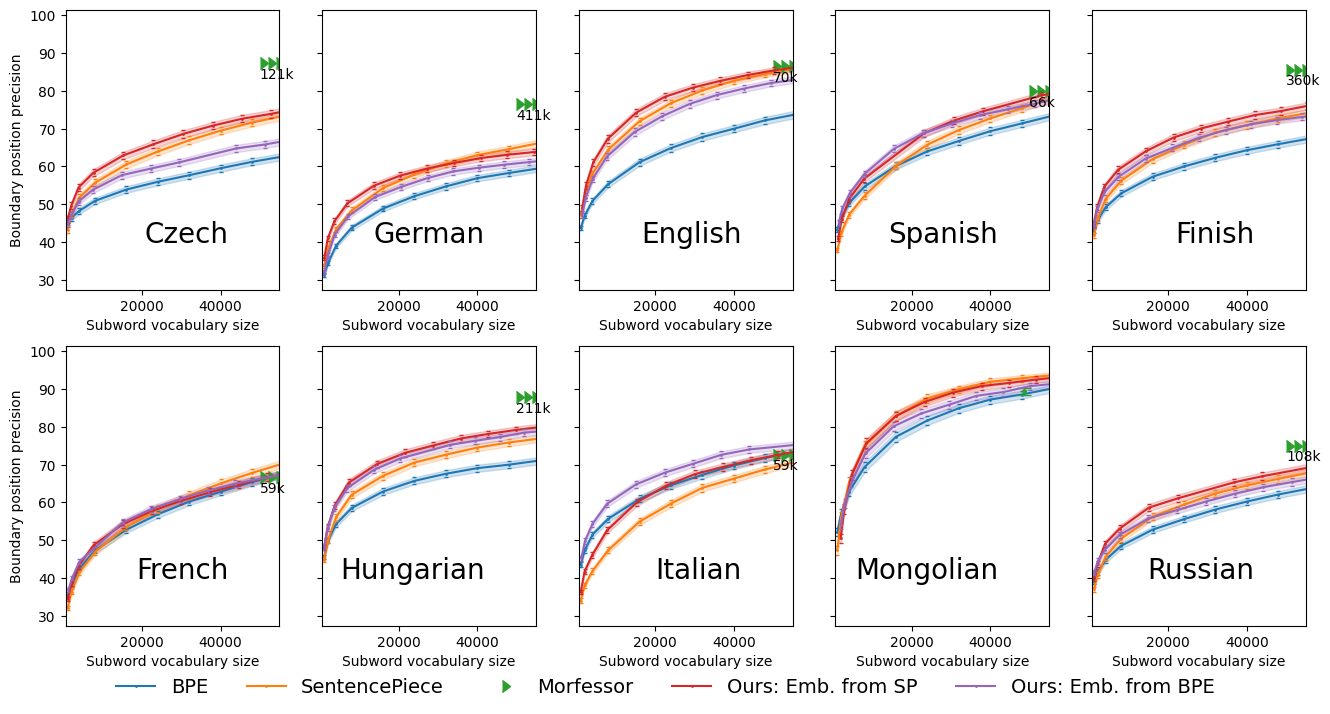

In [9]:
plot_all_results("test")

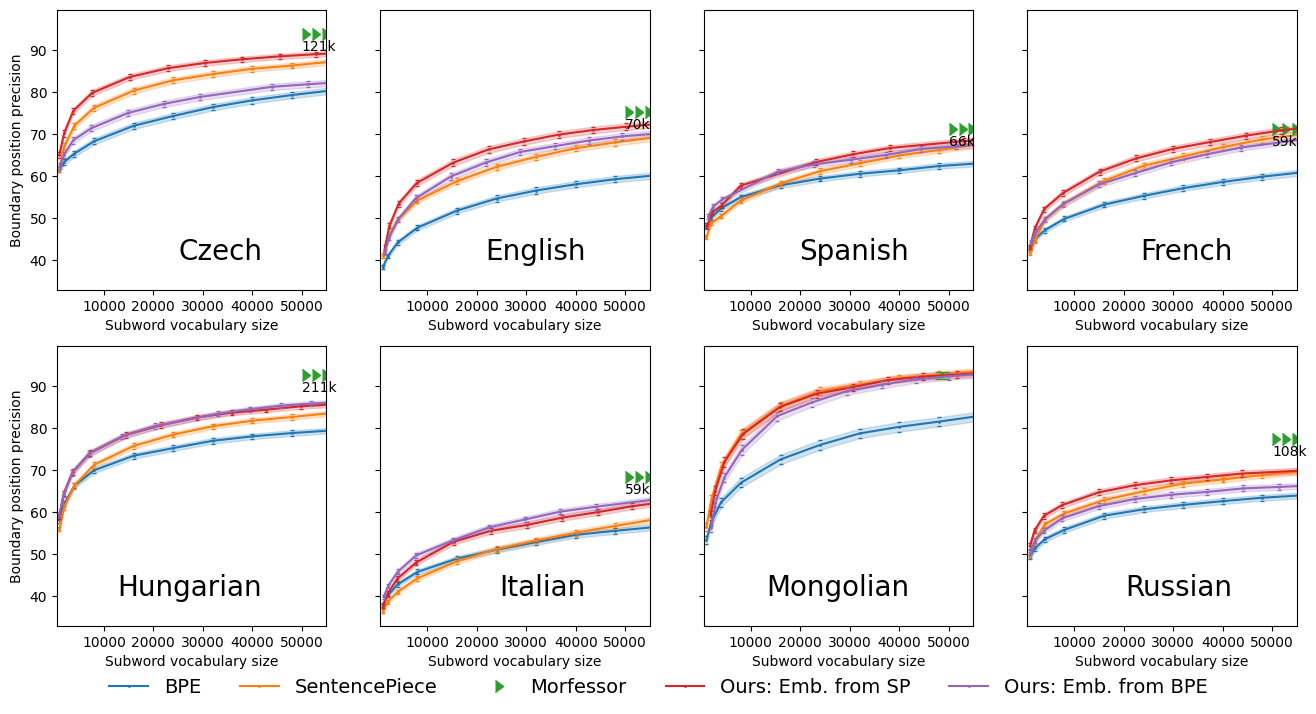

In [12]:
def plot_sigmorphon(test_set):
    fig, axs = plt.subplots(2, 4, sharey=True, figsize=(16, 8))
    plot_lng("cs", axs[0, 0], test_set, show_y_label=True)
    plot_lng("en", axs[0, 1], test_set)
    plot_lng("es", axs[0, 2], test_set)
    plot_lng("fr", axs[0, 3], test_set)
    
    plot_lng("hu", axs[1, 0], test_set, show_y_label=True)
    plot_lng("it", axs[1, 1], test_set)
    plot_lng("mn", axs[1, 2], test_set)
    plot_lng("ru", axs[1, 3], test_set)

    #lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
    #lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
    lines, labels = axs[0, 3].get_legend_handles_labels()
    fig.legend(lines, labels, loc="lower center", ncols=5, frameon=False, fontsize=14)
plot_sigmorphon("sigmorphon")